# 귀펭 (귀여운 펭귄처럼) 미니 프로젝트
* 목적: 남부터미널 근처의 괜찮은 음식점 찾아보기

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import missingno as msno
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
import time
from bs4 import BeautifulSoup

In [2]:
driver = webdriver.Chrome('chromedriver/chromedriver.exe')

In [3]:
def time_for_web():
    driver.implicitly_wait(10)
    time.sleep(3)

In [4]:
driver.get('https://map.kakao.com/')

In [5]:
# 카카오 지도로 이동
driver.get('https://map.kakao.com/')
time_for_web()
# '음식점' 검색어 입력
driver.find_element_by_id('search.keyword.query').send_keys('음식점')
# 검색 클릭
time_for_web()
try:
    driver.find_element_by_id('search.keyword.submit').click()
except:
    print('확인 필요')

In [6]:
# 더보기 클릭
driver.find_element_by_css_selector('#info\.search\.place\.more').click()

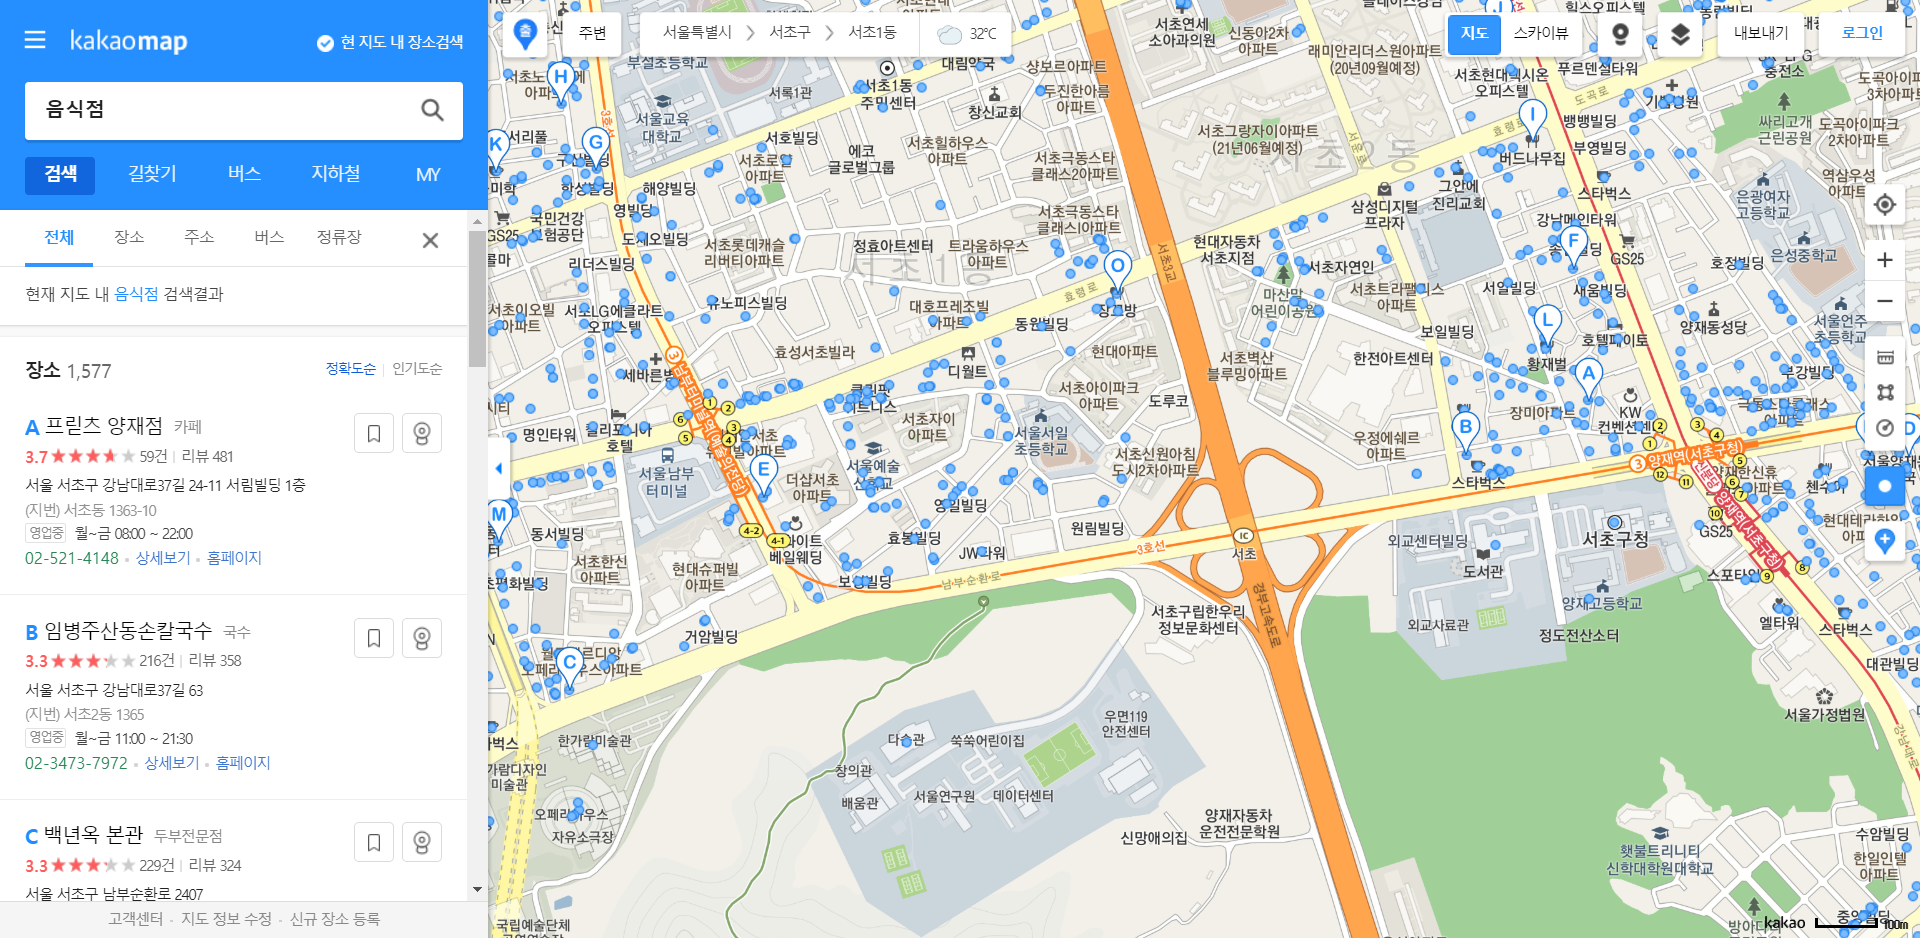
위치는 수동 조정

In [128]:
from tqdm import tqdm_notebook
restaurant = {'name': [], 'category': [], 'address': [],
              'score': [], 'eval_cnt': [], 'review_cnt': []}
for pagenum in tqdm_notebook(range(1, 36)):
    try: 
        # 현재 페이지의 음식점 정보 크롤링
        page = pagenum % 5
        soup = driver.page_source
        b = BeautifulSoup(soup, 'lxml')
        for num in range(0, 15):
            restaurant['name'].append(b.find_all('a','link_name')[num].text)
            restaurant['category'].append(b.find_all('span', 'subcategory')[num].text)
            restaurant['address'].append(b.find_all('p', 'lot_number')[num].text)
            restaurant['score'].append(b.find_all('em', 'num')[num].text)
            restaurant['eval_cnt'].append(b.find_all('a', 'numberofscore')[num].text)
            restaurant['review_cnt'].append(b.find_all('a', 'review', 'em')[num].text)
        time_for_web
        # 다음 페이지 or 다음 버튼
        if page:
            driver.find_element_by_id('info.search.page.no{}'.format(page+1)).click()
        else:
            driver.find_element_by_id('info.search.page.next').click()
    except:
        print('페이지 초과 or 끝')
        break

페이지 초과 or 끝


In [68]:
# df = pd.read_csv('source/restaurant_raw.csv', index_col=0)
# df.head()

,name,category,address,score,eval_cnt,review_cnt
0,루엘드파리,"제과,베이커리",(지번) 서초동 1445-13,3.9,72건,리뷰 267
1,봉산옥 서초동본점,국수,(지번) 서초3동 1451-9,3.7,79건,리뷰 146
2,장꼬방,"찌개,전골",(지번) 서초동 1438-8,3.2,299건,리뷰 124
3,해담채 남부터미널점,"해물,생선",(지번) 서초동 1600-9,3.1,10건,리뷰 47
4,카페로비,디저트카페,(지번) 서초동 1564-4,3.9,15건,리뷰 126


In [114]:
df_new.tail()

,name,category,address,score,eval_cnt,review_cnt
310,투모로우,양식,,0.0,0건,리뷰 0
311,도마,한식,(지번) 서초동 1330-14,0.0,0건,리뷰 0
312,도소도시,양식,(지번) 서초동 1330,0.0,0건,리뷰 0
313,쇼부,술집,(지번) 서초동 1330-13,0.0,0건,리뷰 0
314,충무해운,분식,(지번) 서초동 1330-9,0.0,0건,리뷰 0


In [129]:
df_new = pd.DataFrame(restaurant)
# df_new.tail()
df = pd.concat([df, df_new])
df.shape

(7885, 6)

In [136]:
df_final = df.drop_duplicates('name', keep='first')

In [137]:
df_final.head()

,name,category,address,score,eval_cnt,review_cnt
0,루엘드파리,"제과,베이커리",(지번) 서초동 1445-13,3.9,72건,리뷰 267
1,봉산옥 서초동본점,국수,(지번) 서초3동 1451-9,3.7,79건,리뷰 146
2,장꼬방,"찌개,전골",(지번) 서초동 1438-8,3.2,299건,리뷰 124
3,해담채 남부터미널점,"해물,생선",(지번) 서초동 1600-9,3.1,10건,리뷰 47
4,카페로비,디저트카페,(지번) 서초동 1564-4,3.9,15건,리뷰 126


In [138]:
df_final.tail()

,name,category,address,score,eval_cnt,review_cnt
82,스테이크트럭,"스테이크,립",(지번) 서초동 700,0.0,0건,리뷰 0
84,라이브테마,"호프,요리주점",(지번) 서초동 1451-2,0.0,0건,리뷰 0
85,자매식당,한식,(지번) 서초3동 1446-11,0.0,0건,리뷰 0
86,지정에프엔비,음식점,(지번) 서초동 1451-93,0.0,0건,리뷰 0
87,릿츠,양식,(지번) 서초동 1463-4,0.0,0건,리뷰 0


In [8]:
# df = pd.DataFrame(restaurant)
# df

,name,category,address,score,eval_cnt,review_cnt
0,시래옥 서초직영점,한식,(지번) 서초동 1675-13,2.8,14건,리뷰 39
1,마음은콩밭에 교대본점,한정식,(지번) 서초동 1675-3,2.8,24건,리뷰 32
2,수타우동겐,"돈까스,우동",(지번) 서초동 1690-3,2.9,33건,리뷰 124
3,미카도스시 교대점,"초밥,롤",(지번) 서초동 1698-15,3.0,6건,리뷰 128
4,이심전심 언양불고기 본점,"불고기,두루치기",(지번) 서초동 1658-12,4.1,25건,리뷰 44
...,...,...,...,...,...,...
499,더트리빈,카페,(지번) 서초동 1573-10,0.0,0건,리뷰 0
500,백련포크,"육류,고기",(지번) 서초동 1685-8,0.0,0건,리뷰 0
501,한판,한식,(지번) 서초동 1673-6,0.0,0건,리뷰 0
502,내몸애황칠,한식,(지번) 서초동 1694-17,0.0,0건,리뷰 0


In [141]:
df_final.shape

(3929, 6)

In [140]:
df_final.to_csv('./source/restaurant_raw_200630(sean).csv')